<a href="https://colab.research.google.com/github/Sojwal27/Phishing-Detection-using-machine-learning/blob/main/Phishing_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tldextract

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract
from urllib.parse import urlparse
import re
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **1.Loading the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/malicious_phish.csv')
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


#  **2. Familiarizing with Data**

In [ ]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.columns

Index(['url', 'type'], dtype='object')

In [ ]:
df.shape

(651191, 2)

In [ ]:
df.isnull().sum()

,0
url,0
type,0


In [ ]:
type_counts = df['type'].value_counts()
type_counts

,count
type,
benign,428103
defacement,96457
phishing,94111
malware,32520


# **3. VISUALIZING THE DATA**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other

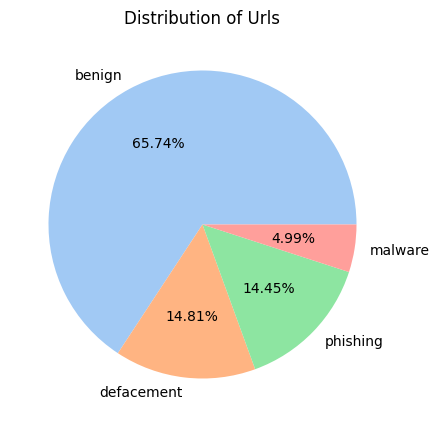

In [ ]:
# Assuming you have type_counts as a pandas Series containing the count of each type
plt.figure(figsize=(5,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Urls')
plt.show()

In [ ]:
# Remove "www." from URLs and update the 'url' column
df['url'] = df['url'].str.replace('www.', '')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
# Create a dictionary to map types to categories
type_to_category = {
    "benign": 0,
    "defacement": 1,
    "phishing": 2,
    "malware": 3
}

# Add a new 'Category' column based on the 'type' column
df['Category'] = df['type'].map(type_to_category)

In [ ]:
df.head()

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


In [ ]:
# Add a new 'URL_Length' column with the length of each URL
df['URL_Length'] = df['url'].apply(len)

In [ ]:
df.shape

(651191, 4)

In [ ]:
df.head()

,url,type,Category,URL_Length
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


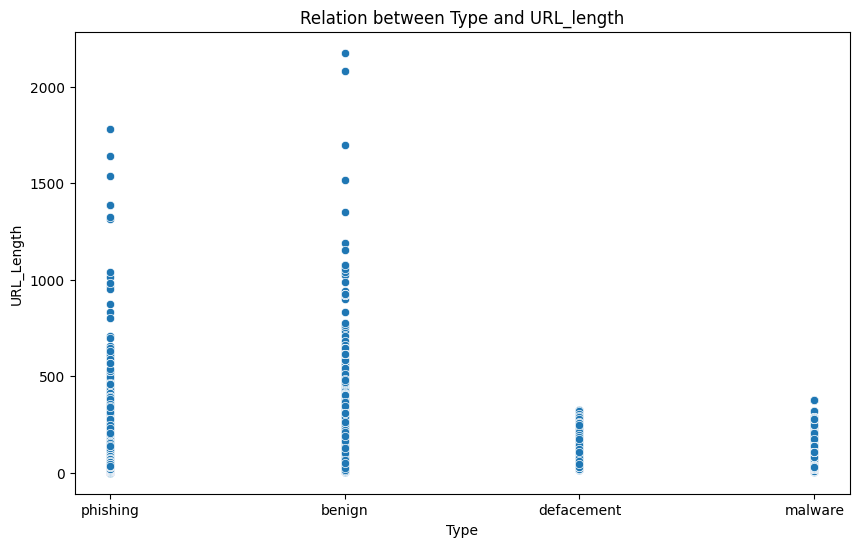

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='type' , y='URL_Length', )
plt.title('Relation between Type and URL_length')
plt.xlabel('Type')
plt.ylabel('URL_Length')
plt.show()

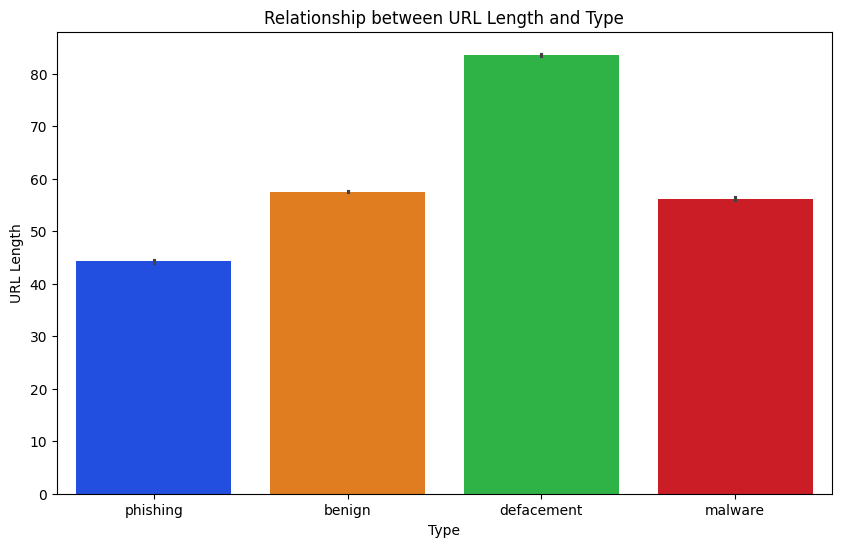

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='URL_Length',palette="bright")
plt.xlabel('Type')
plt.ylabel('URL Length')
plt.title("Relationship between URL Length and Type")
plt.show()

In [ ]:
# Calculate the ratios for each URL type within the same type
df['type_ratio'] = df.groupby('type')['URL_Length'].transform(lambda x: x / x.sum() * 100)


In [ ]:
df.shape

(651191, 5)

In [ ]:
df.head()

,url,type,Category,URL_Length,type_ratio
0,br-icloud.com.br,phishing,2,16,0.000384
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916


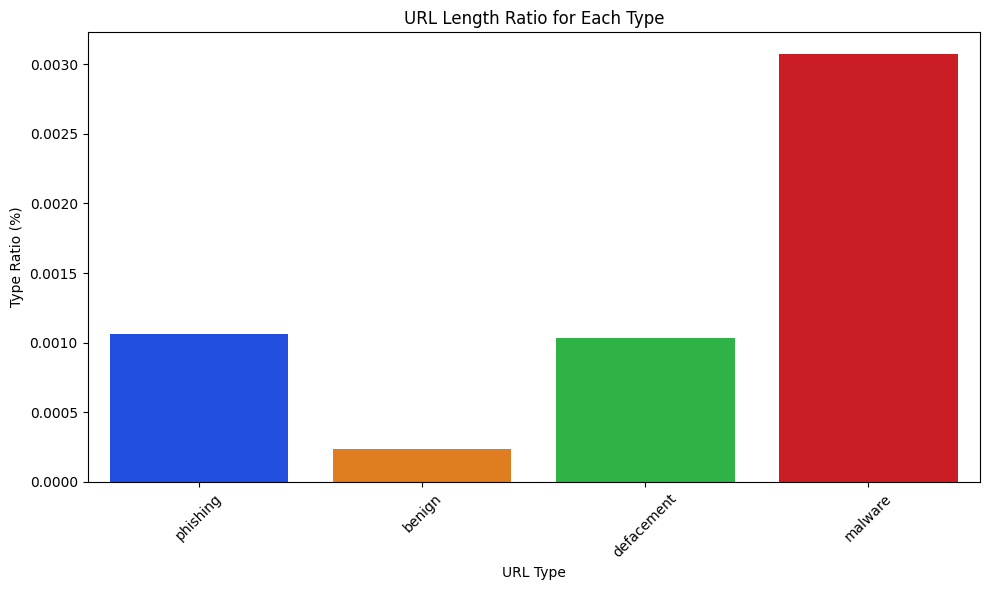

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='type_ratio', ci=None, palette='bright')
plt.title("URL Length Ratio for Each Type")
plt.ylabel("Type Ratio (%)")
plt.xlabel("URL Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Function to extract domain from URL using tldextract
def extract_domain(url):
    extracted = tldextract.extract(url)
    return f"{extracted.domain}.{extracted.suffix}"

# Add a new 'domain' column with the extracted domain from each URL
df['domain'] = df['url'].apply(extract_domain)

In [ ]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net


In [ ]:
df.shape

(651191, 6)

In [ ]:
# List of characters to count
characters_to_count = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']

# Function to count occurrences of a character in a URL
def count_character_occurrences(url, character):
    return url.count(character)

# Add new columns for each character and count occurrences
for character in characters_to_count:
    df[f'{character}'] = df['url'].apply(lambda url: count_character_occurrences(url, character))

In [ ]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [ ]:
# Function to detect if there's a match between URL and host
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

# Add a new 'Abnormal_URL' column with 1 if there's a match, 0 otherwise
df['Abnormal_URL'] = df['url'].apply(abnormal_url)

In [ ]:
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,Abnormal_URL
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1


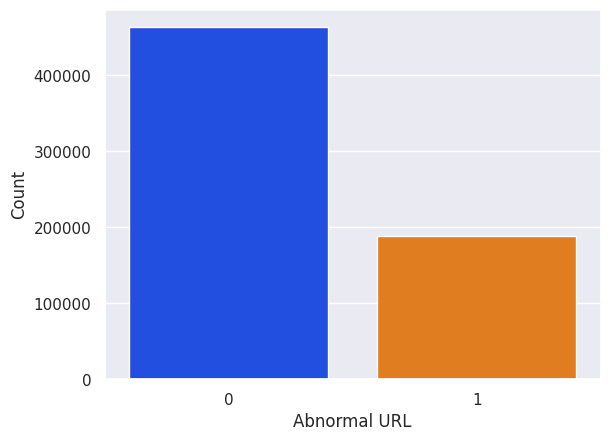

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Abnormal_URL', data=df, palette="bright")
plt.xlabel('Abnormal URL')
plt.ylabel('Count')
plt.show()

In [ ]:
# Function to detect if the URL has "https"
def has_https(url):
    return int("https" in url)

# Add a new 'Has_HTTPS' column with 1 if there's "https", 0 otherwise
df['Has_HTTPS'] = df['url'].apply(has_https)
df.head()

,url,type,Category,URL_Length,type_ratio,domain,@,?,-,=,...,#,%,+,$,!,*,",",//,Abnormal_URL,Has_HTTPS
0,br-icloud.com.br,phishing,2,16,0.000384,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0.000142,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0.000126,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0.001042,garage-pirenne.be,0,1,1,4,...,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0.002916,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,0,0,0,1,1,0


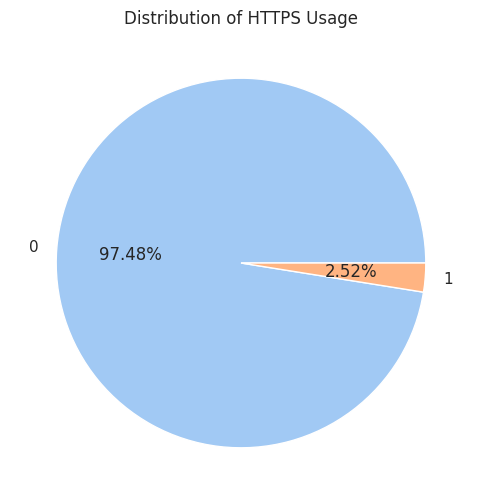

In [ ]:
# Count the occurrences of each value in the "Has_HTTPS" column
https_counts = df['Has_HTTPS'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(https_counts, labels=https_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of HTTPS Usage')
plt.show()

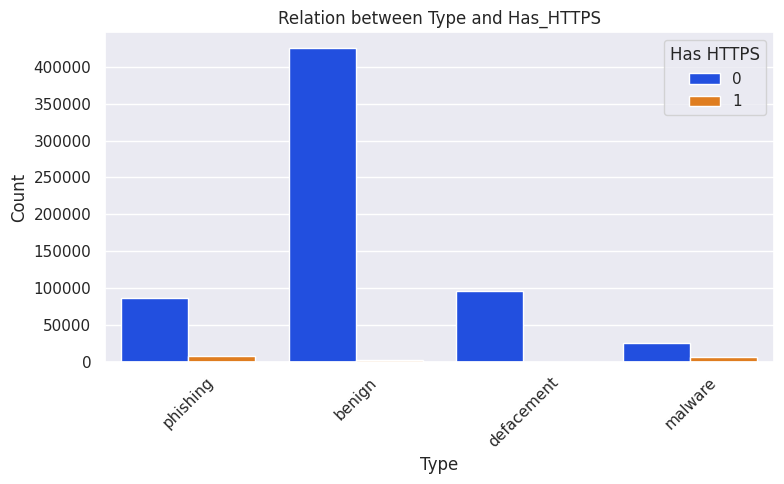

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='Has_HTTPS',palette="bright")
plt.title("Relation between Type and Has_HTTPS")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has HTTPS")
plt.tight_layout()
plt.show()